# Titanic Survival Prediction


## Libraries and data

In [10]:
# librarys 
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calibration 
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


In [12]:
# gender = pd.read_csv(r"C:\repo\jhoan-meza\5. Learning by doing\1. Titanic\gender_submission.csv")
train = pd.read_csv(r"C:\repo\jhoan-meza\5. Learning by doing\1. Titanic\train.csv")
test = pd.read_csv(r"C:\repo\jhoan-meza\5. Learning by doing\1. Titanic\test.csv")


## Construction of Dataset

The target variable of our model is "Survive" witch indicade whether passenger suvive (1) or not (0)


In [13]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
#gender.columns


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [18]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [19]:
test_copy = test.copy()
train_copy = train.copy()

In [20]:
# TRANFORMATIONS 

# Drop columns that are not useful for the model
test_copy = test_copy.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
train_copy = train_copy.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Sepate features and target variable
y_train = train_copy['Survived']
x_train = train_copy.drop(columns=['Survived'])




In [21]:
test_copy.isnull().sum().sort_values(ascending=False), train_copy.isnull().sum().sort_values(ascending=False)

(Age         86
 Fare         1
 Pclass       0
 Sex          0
 SibSp        0
 Parch        0
 Embarked     0
 dtype: int64,
 Age         177
 Embarked      2
 Survived      0
 Pclass        0
 Sex           0
 SibSp         0
 Parch         0
 Fare          0
 dtype: int64)

## Descriptive analytics


In [22]:
y_train.value_counts(), y_train.value_counts(normalize=True)

(Survived
 0    549
 1    342
 Name: count, dtype: int64,
 Survived
 0    0.616162
 1    0.383838
 Name: proportion, dtype: float64)

In [23]:
x_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
x_train['Sex'].value_counts() , x_train['Sex'].value_counts(normalize=True)

(Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Sex
 male      0.647587
 female    0.352413
 Name: proportion, dtype: float64)

In [25]:
pd.crosstab(x_train['Sex'], y_train, normalize='index') 


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [26]:
pd.crosstab(x_train['Pclass'], y_train, normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


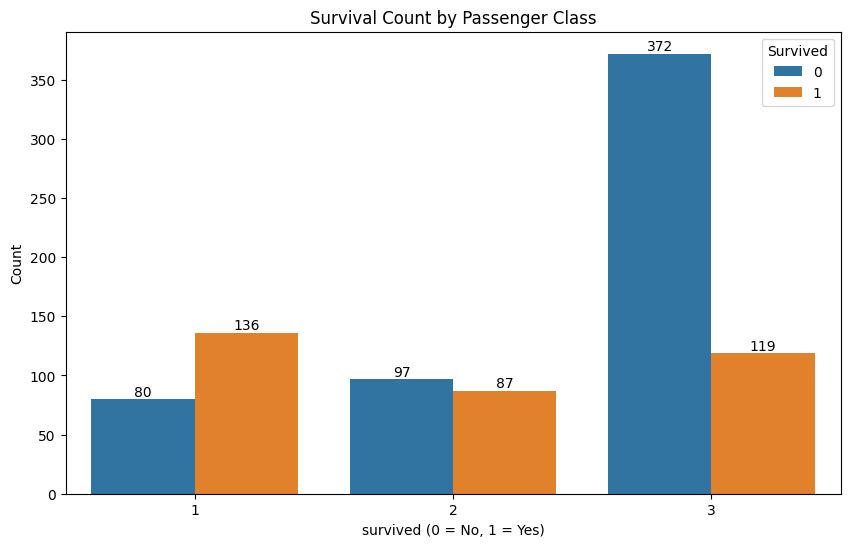

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_copy, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()

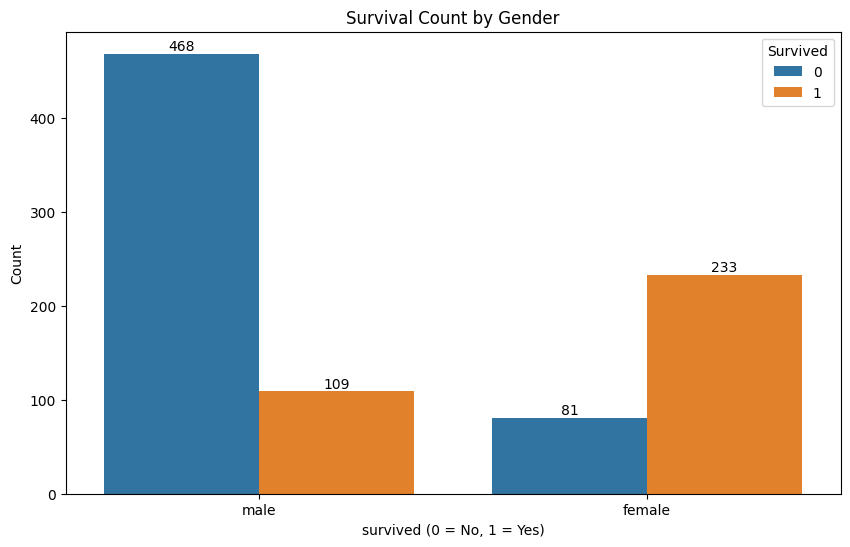

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_copy, x= 'Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('survived (0 = No, 1 = Yes)')
plt.ylabel('Count') 

for bar in plt.gca().containers:
    plt.gca().bar_label(bar)

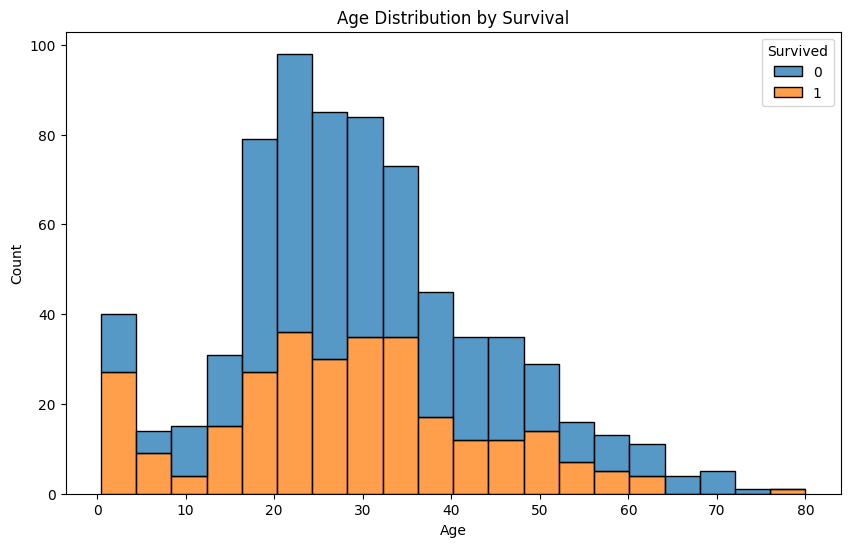

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_copy, x='Age', hue='Survived', multiple='stack', bins=20)       
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

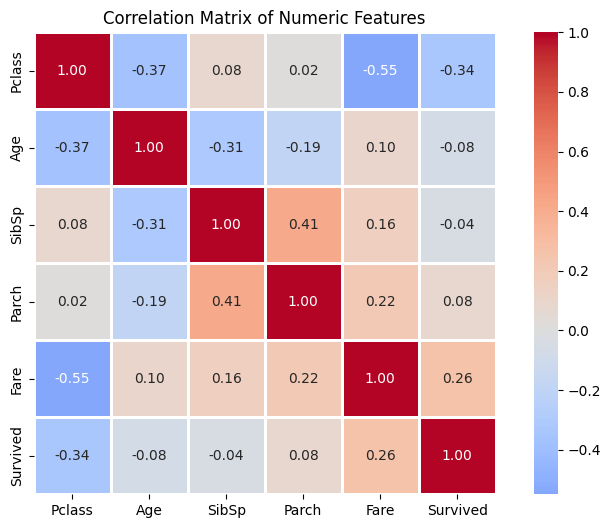

In [30]:
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
correlation_matrix = train_copy[numeric_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, square=True, center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Pre-processing and Feature Engenering

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [32]:
## Feature Engineering 

# Family Size
x_train['FamilySize'] = x_train['SibSp'] + x_train['Parch'] + 1
test_copy['FamilySize'] = test_copy['SibSp'] + test_copy['Parch'] + 1

# Is Alone
x_train['IsAlone'] = (x_train['FamilySize'] == 1).astype(int)
test_copy['IsAlone'] = (test_copy['FamilySize'] == 1).astype(int)



In [33]:
variable_dictionary = {
    "Survived": "Variable objetivo. 1 si el pasajero sobrevivió, 0 en caso contrario.",
    "Pclass": "Clase del boleto (1 = primera, 2 = segunda, 3 = tercera). Proxy de nivel socioeconómico.",
    "Sex": "Sexo del pasajero (male, female).",
    "Age": "Edad del pasajero en años.",
    "SibSp": "Número de hermanos y/o cónyuge a bordo.",
    "Parch": "Número de padres y/o hijos a bordo.",
    "Fare": "Precio del boleto pagado por el pasajero.",
    "Embarked": "Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).",
    "FamilySize": "Tamaño del grupo familiar: SibSp + Parch + 1.",
    "IsAlone": "Indicador binario: 1 si el pasajero viajaba solo, 0 si no."
}


In [34]:
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
categorical_features = ['Sex', 'Embarked']

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())    
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])  
# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [35]:
X_train_full = preprocessor.fit_transform(x_train)  # 891 filas
X_test_full = preprocessor.transform(test_copy)

## Model selection and training



### Logistic Regretion

In [36]:
from sklearn.model_selection import train_test_split

# Use labels aligned with X_train_full
y_full = train_copy['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_full,
    y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

# Save training labels for later use
Y_train = y_train_split

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (712, 12)
Validation set size: (179, 12)


In [37]:
# VALIDATION MODEL

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, Y_train)

# Prediction on the validation set
y_val_preds = model.predict(X_val)
y_val_probs = model.predict_proba(X_val)[:, 1]



### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, Y_train)

# Validation predictions
y_val_preds = rf_model.predict(X_val)
y_val_probs = rf_model.predict_proba(X_val)[:, 1]


### Gradient Boodting

In [39]:
from sklearn.ensemble import RandomForestClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model
gb_model.fit(X_train, Y_train)

# Validation predictions
y_val_preds = gb_model.predict(X_val)
y_val_probs = gb_model.predict_proba(X_val)[:, 1]



### Support Vector Machine

In [40]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
    )

svm_model.fit(X_train, Y_train)

# Validation predictions
y_val_preds = svm_model.predict(X_val)
y_val_probs = svm_model.predict_proba(X_val)[:, 1]


In [41]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=5,          # Número de vecinos
    weights='distance',     # Ponderación por distancia
    metric='euclidean'
)

knn_model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

### Application of emseble Learnig



In [42]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier with different models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('svm', svm_model),
        ('knn', knn_model)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)
voting_clf.fit(X_train, Y_train)
# Validation predictions
y_val_preds = voting_clf.predict(X_val)
y_val_probs = voting_clf.predict_proba(X_val)[:, 1]


## Cross-Validation

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ============================================
# LOGISTIC REGRESSION
# ============================================
y_val_preds = model.predict(X_val)
y_val_probs = model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_preds)
precision = precision_score(y_val, y_val_preds)
recall = recall_score(y_val, y_val_preds)
f1 = f1_score(y_val, y_val_preds)
roc_auc = roc_auc_score(y_val, y_val_probs)

# ============================================
# RANDOM FOREST
# ============================================
y_val_preds_rf = rf_model.predict(X_val)
y_val_probs_rf = rf_model.predict_proba(X_val)[:, 1]

accuracy_rf = accuracy_score(y_val, y_val_preds_rf)
precision_rf = precision_score(y_val, y_val_preds_rf)
recall_rf = recall_score(y_val, y_val_preds_rf)
f1_rf = f1_score(y_val, y_val_preds_rf)
roc_auc_rf = roc_auc_score(y_val, y_val_probs_rf)

# ============================================
# GRADIENT BOOSTING
# ============================================
y_val_preds_gb = gb_model.predict(X_val)
y_val_probs_gb = gb_model.predict_proba(X_val)[:, 1]

accuracy_gb = accuracy_score(y_val, y_val_preds_gb)
precision_gb = precision_score(y_val, y_val_preds_gb)
recall_gb = recall_score(y_val, y_val_preds_gb)
f1_gb = f1_score(y_val, y_val_preds_gb)
roc_auc_gb = roc_auc_score(y_val, y_val_probs_gb)

# ============================================
# SVM
# ============================================
y_val_preds_svm = svm_model.predict(X_val)
y_val_probs_svm = svm_model.predict_proba(X_val)[:, 1]

accuracy_svm = accuracy_score(y_val, y_val_preds_svm)
precision_svm = precision_score(y_val, y_val_preds_svm)
recall_svm = recall_score(y_val, y_val_preds_svm)
f1_svm = f1_score(y_val, y_val_preds_svm)
roc_auc_svm = roc_auc_score(y_val, y_val_probs_svm)

# ============================================
# KNN
# ============================================
y_val_preds_knn = knn_model.predict(X_val)
y_val_probs_knn = knn_model.predict_proba(X_val)[:, 1]

accuracy_knn = accuracy_score(y_val, y_val_preds_knn)
precision_knn = precision_score(y_val, y_val_preds_knn)
recall_knn = recall_score(y_val, y_val_preds_knn)
f1_knn = f1_score(y_val, y_val_preds_knn)
roc_auc_knn = roc_auc_score(y_val, y_val_probs_knn)

# ============================================
# ENSEMBLE
# ============================================
y_val_preds_ens = voting_clf.predict(X_val)
y_val_probs_ens = voting_clf.predict_proba(X_val)[:, 1]

accuracy_ens = accuracy_score(y_val, y_val_preds_ens)
precision_ens = precision_score(y_val, y_val_preds_ens)
recall_ens = recall_score(y_val, y_val_preds_ens)
f1_ens = f1_score(y_val, y_val_preds_ens)
roc_auc_ens = roc_auc_score(y_val, y_val_probs_ens)



In [44]:
import pandas as pd

# Crear tabla con todos los resultados
results = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Ensemble'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_gb, accuracy_svm, accuracy_knn, accuracy_ens],
    'Precision': [precision, precision_rf, precision_gb, precision_svm, precision_knn, precision_ens],
    'Recall': [recall, recall_rf, recall_gb, recall_svm, recall_knn, recall_ens],
    'F1 Score': [f1, f1_rf, f1_gb, f1_svm, f1_knn, f1_ens],
    'ROC AUC': [roc_auc, roc_auc_rf, roc_auc_gb, roc_auc_svm, roc_auc_knn, roc_auc_ens]
})

# Ordenar por F1 Score (de mayor a menor)
results = results.sort_values('F1 Score', ascending=False).reset_index(drop=True)

# Mostrar tabla
print("\n" + "="*90)
print("📊 COMPARACIÓN DE MODELOS - Métricas en Validación")
print("="*90 + "\n")
display(results)

# Resaltar el mejor modelo
best_model = results.iloc[0]['Modelo']
best_f1 = results.iloc[0]['F1 Score']
print(f"\n🏆 Mejor modelo: {best_model}")
print(f"   F1 Score: {best_f1:.4f}")


📊 COMPARACIÓN DE MODELOS - Métricas en Validación



,Modelo,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Ensemble,0.837989,0.833333,0.724638,0.775194,0.862055
1,Random Forest,0.832402,0.830508,0.710145,0.765625,0.835837
2,SVM,0.821229,0.824561,0.681159,0.746032,0.840184
3,KNN,0.810056,0.777778,0.710145,0.742424,0.853426
4,Logistic Regression,0.804469,0.783333,0.681159,0.728682,0.851252
5,Gradient Boosting,0.810056,0.830189,0.637681,0.721311,0.822069



🏆 Mejor modelo: Ensemble
   F1 Score: 0.7752


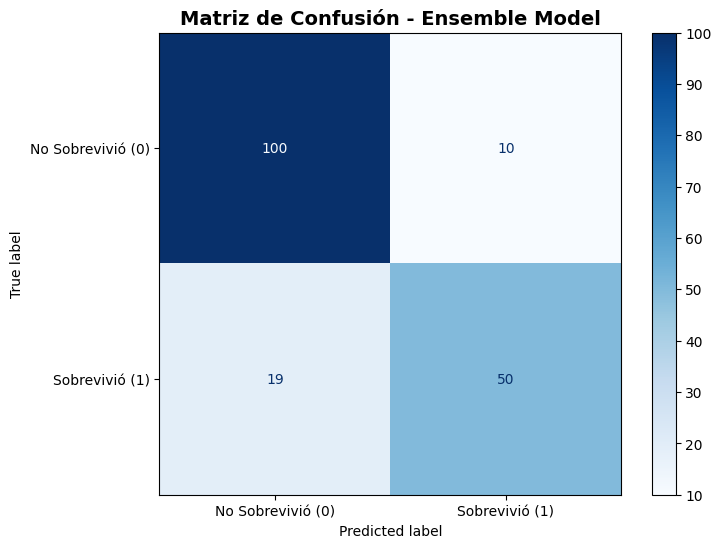


📊 ANÁLISIS DE LA MATRIZ DE CONFUSIÓN:
True Negatives (TN):  100 - Predijo NO murió y fue correcto
False Positives (FP): 10 - Predijo murió pero sobrevivió (Error Tipo I)
False Negatives (FN): 19 - Predijo sobrevivió pero murió (Error Tipo II)
True Positives (TP):  50 - Predijo sobrevivió y fue correcto


In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión del mejor modelo (Ensemble)
cm = confusion_matrix(y_val, y_val_preds_ens)

# Visualizar
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Sobrevivió (0)', 'Sobrevivió (1)'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title('Matriz de Confusión - Ensemble Model', fontsize=14, fontweight='bold')
plt.show()

# Interpretar resultados
tn, fp, fn, tp = cm.ravel()
print("\n📊 ANÁLISIS DE LA MATRIZ DE CONFUSIÓN:")
print(f"True Negatives (TN):  {tn} - Predijo NO murió y fue correcto")
print(f"False Positives (FP): {fp} - Predijo murió pero sobrevivió (Error Tipo I)")
print(f"False Negatives (FN): {fn} - Predijo sobrevivió pero murió (Error Tipo II)")
print(f"True Positives (TP):  {tp} - Predijo sobrevivió y fue correcto")

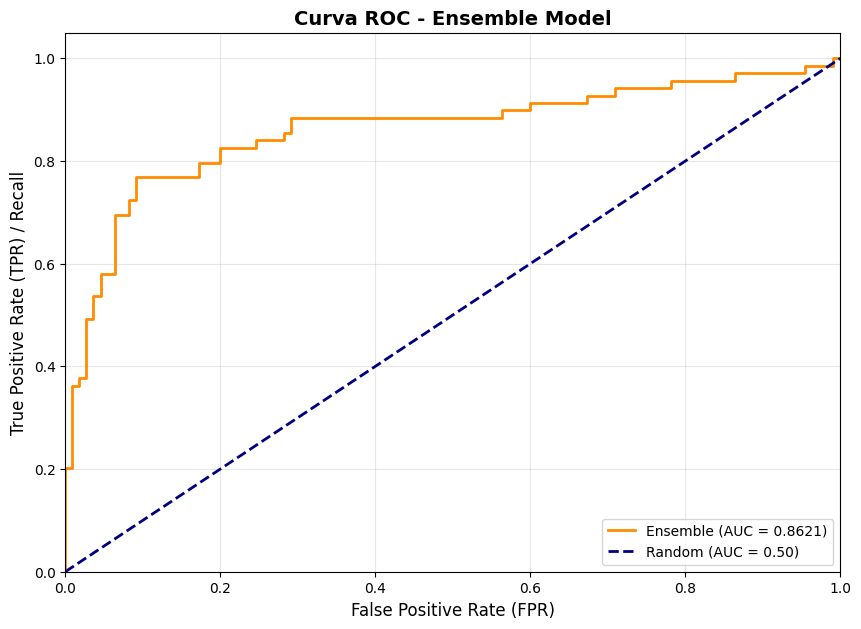


📊 ROC AUC Score: 0.8621

💡 Interpretación:
- AUC = 1.0: Modelo perfecto
- AUC = 0.5: Modelo aleatorio (lanzar moneda)
- AUC = 0.8621: Nuestro modelo


In [46]:
from sklearn.metrics import roc_curve, auc

# Calcular curva ROC para el Ensemble
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs_ens)
roc_auc_value = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Ensemble (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=12)
plt.title('Curva ROC - Ensemble Model', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"\n📊 ROC AUC Score: {roc_auc_value:.4f}")
print("\n💡 Interpretación:")
print("- AUC = 1.0: Modelo perfecto")
print("- AUC = 0.5: Modelo aleatorio (lanzar moneda)")
print(f"- AUC = {roc_auc_value:.4f}: Nuestro modelo")

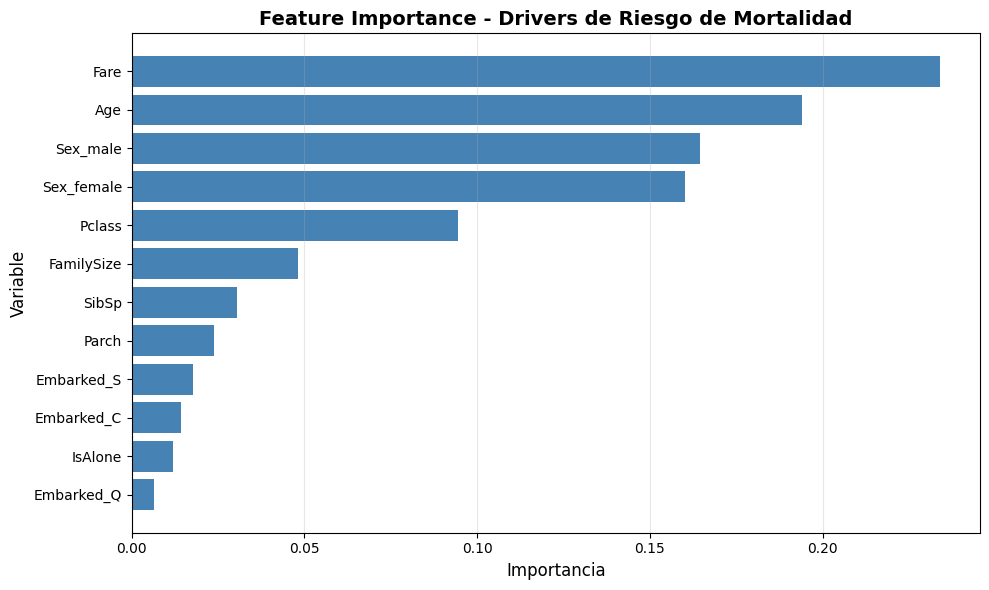


📊 TOP 5 VARIABLES MÁS IMPORTANTES:
      Feature  Importance
4        Fare    0.233813
1         Age    0.194114
8    Sex_male    0.164455
7  Sex_female    0.160188
0      Pclass    0.094417


In [47]:
# Feature Importance del Random Forest (es el mejor individual)
import numpy as np

# Obtener importancias
importances = rf_model.feature_importances_

# Obtener nombres de features del preprocesador
# Numeric features mantienen sus nombres
num_feature_names = numeric_features

# Obtener nombres de las categorías codificadas
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combinar todos los nombres
feature_names = list(num_feature_names) + list(cat_feature_names)

# Crear DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Feature Importance - Drivers de Riesgo de Mortalidad', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 TOP 5 VARIABLES MÁS IMPORTANTES:")
print(importance_df.head())

In [50]:
import joblib

# ... tu código de entrenamiento ...

# Guardar con joblib (es más directo, no necesitas 'open')
joblib.dump(preprocessor, 'preprocessor.joblib')
# Usa el modelo de ensamble ya entrenado: voting_clf
joblib.dump(voting_clf, 'ensemble_model.joblib')

print("¡Modelos guardados exitosamente con Joblib!")

¡Modelos guardados exitosamente con Joblib!
